
# Lab 11: Understanding the data. 

Last 2 classes we have been working on understanding data. In this lab you will apply that.


**Context**
The goal of this lab is to understand a large dataset of 27901 rows and 18 columns Perform Exploratory Data Analysis (EDA) on the data. Look at how the data effects the end result **depression** (yes/no)
## Part 1
- Load and get a basic understanding of the dataset
- Clean up the data 
    - examples:
        - check and fix any missing data 
        - use both Hot and integer encoding
        - convert any numeric data from strings to ints
- Perform Exploratory Data Analysis (EDA) 
    - I will leave it to you to understand and explore this. 
        - Histplot
        - Countplot
        - Correlation
        - Heatmaps
        - boxplots
        - have fun

Make sure to communicate to me along the way. I want your to tell me what your assumptions are what your learning about the data and what you learned with EDA.  There are 18 data points for each student I expect an perform EDA on most of those points like what we did in class with MPG. 

##### ***Remember*** how we did a `sns.pairplot(df[[ "cylinders", "mpg","model_year"]])` and `sns.pairplot(df[["mpg", "horsepower", "weight", "displacement"]])` 


## Part 2: 
Model the data using what we learned in `Linear_Regression_Part2.ipynb` predict if a student will or will not have `Depression` 

- Perform linear Regression on the model using `DecisionTreeRegressor`
- Have at least 5 different models and how dropping a column effects the data predictor 
- Once you find a model with a good prediction play with the size of your test and training data to understand how it affects your model
    - compare the `R²` score  and the `MAE` to show improvement or degradation of the model.

**Remember to have fun with this**

----------------------------------------------------------------------------------------------------------------------------------------------

From: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data


Field Descriptions

**id** - A unique identifier assigned to each student record in the dataset.

**Gender** - The gender of the student (e.g., Male, Female, Other). This helps in analyzing gender-specific trends in mental health.

**Age** - The age of the student in years.

**City** - The city or region where the student resides, providing geographical context for the analysis.

**Profession** - The field of work or study of the student, which may offer insights into occupational or academic stress factors.

**Academic Pressure** - A measure indicating the level of pressure the student faces in academic settings. This could include stress from exams, assignments, and overall academic expectations.

**Work Pressure** - A measure of the pressure related to work or job responsibilities, relevant for students who are employed alongside their studies.

**CGPA** - The cumulative grade point average of the student, reflecting overall academic performance.

**Study Satisfaction** - An indicator of how satisfied the student is with their studies, which can correlate with mental well-being.

**Job Satisfaction** - A measure of the student’s satisfaction with their job or work environment, if applicable.

**Sleep Duration** - The average number of hours the student sleeps per day, which is an important factor in mental health.

**Dietary Habits** - An assessment of the student’s eating patterns and nutritional habits, potentially impacting overall health and mood.

**Degree** - The academic degree or program that the student is pursuing.

**Have you ever had suicidal thoughts ?** - A binary indicator (Yes/No) that reflects whether the student has ever experienced suicidal ideation.

**Work/Study Hours** - The average number of hours per day the student dedicates to work or study, which can influence stress levels.

**Financial Stress** - A measure of the stress experienced due to financial concerns, which may affect mental health.

**Family History of Mental Illness** - Indicates whether there is a family history of mental illness (Yes/No), which can be a significant factor in mental health predispositions.

**Depression** - The target variable that indicates whether the student is experiencing depression (Yes/No).

------------------------------------------------------------------------------------------------------------------------------------------------

*Provided for reference only*
``` python 
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

#move the dowload to the current directory
shutil.move(path, "./Lab_11_dataset")
````

In [155]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# loading the dataset
df = pd.read_csv("./student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [156]:
df[(df['Gender'] == 'Male') & (df['Depression'] == 1)]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1
10,83,Male,24.0,Nagpur,Student,3.0,0.0,6.10,3.0,0.0,'5-6 hours',Moderate,'Class 12',Yes,11.0,1.0,Yes,1
12,94,Male,27.0,Kalyan,Student,5.0,0.0,7.04,1.0,0.0,'Less than 5 hours',Moderate,M.Tech,No,10.0,1.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27881,140564,Male,27.0,Surat,Student,4.0,0.0,5.16,4.0,0.0,'Less than 5 hours',Moderate,M.Pharm,Yes,6.0,2.0,Yes,1
27884,140594,Male,18.0,Meerut,Student,5.0,0.0,6.25,3.0,0.0,'7-8 hours',Unhealthy,'Class 12',No,11.0,2.0,Yes,1
27887,140624,Male,32.0,Rajkot,Student,4.0,0.0,9.19,1.0,0.0,'5-6 hours',Healthy,MSc,No,7.0,4.0,Yes,1
27888,140630,Male,19.0,Kolkata,Student,4.0,0.0,7.13,1.0,0.0,'More than 8 hours',Moderate,'Class 12',No,10.0,2.0,No,1


In [157]:
#df['Sleep Duration'].unique()
#df['City'].unique()
df['Degree'].unique()
#df['Dietary Habits'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', "'Class 12'",
       'B.Ed', 'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA',
       'B.Com', 'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech',
       'BBA', 'ME', 'MHM', 'Others'], dtype=object)

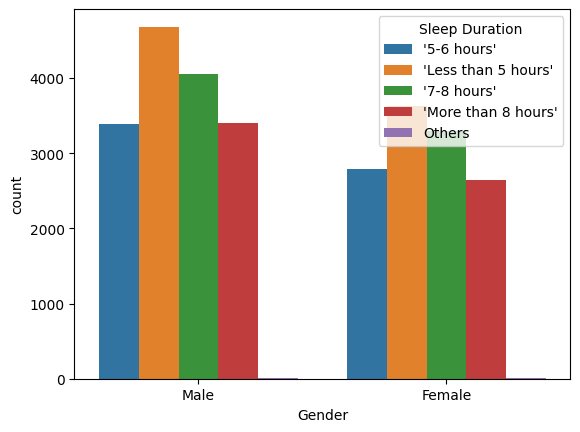

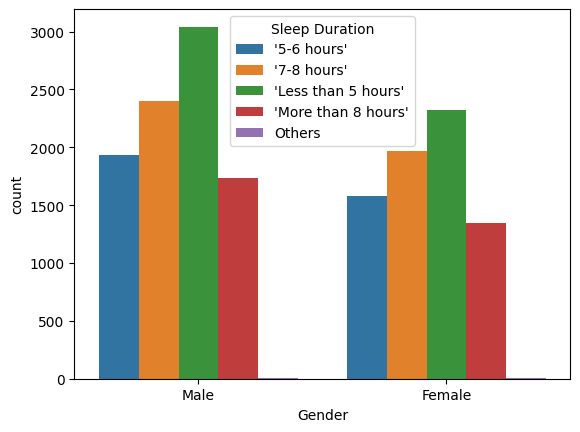

In [158]:
sns.countplot(x='Gender', hue='Sleep Duration', data=df)
plt.show()

depressed_df = df[df['Depression'] == 1]

sns.countplot(x='Gender', hue='Sleep Duration', data=depressed_df)
plt.show()
## Sleep does not correlate with depression

<Axes: xlabel='Work/Study Hours', ylabel='Age'>

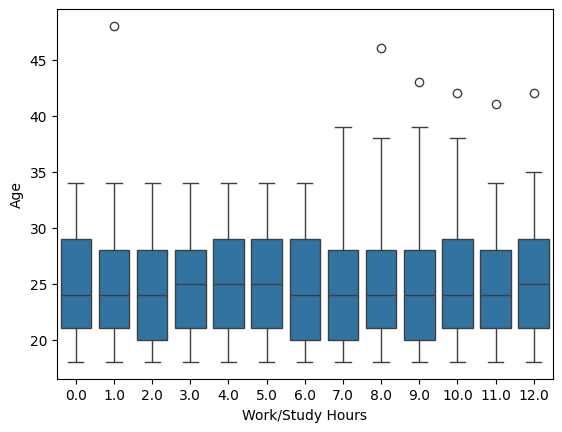

In [159]:
not_depressed_df = df[df['Depression'] == 0]
sns.boxplot(data=depressed_df, y='Age', x='Work/Study Hours')

<Axes: xlabel='Gender', ylabel='Age'>

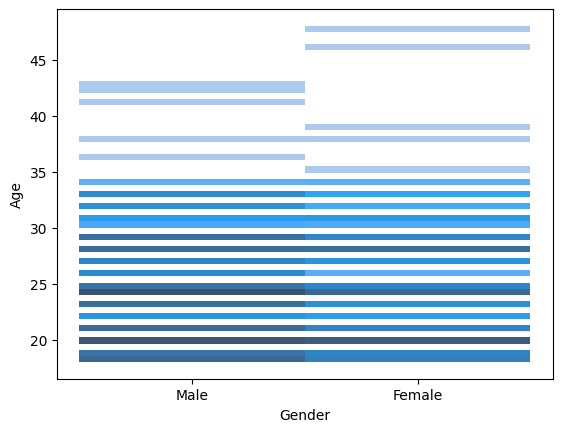

In [ ]:
sns.histplot(x='Gender', y='Age', data=depressed_df) 

<Axes: xlabel='Gender', ylabel='Age'>

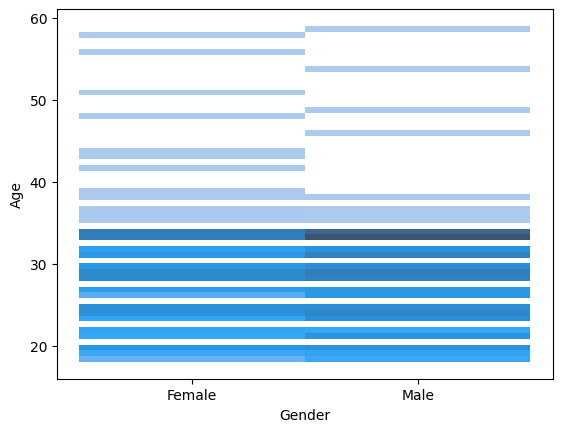

In [ ]:
sns.histplot(x='Gender', y='Age', data=not_depressed_df) ## Theres a more concentrated depression trend in younger people ^ than older
## Note: theres probably a better way to show this

<Axes: xlabel='count', ylabel='City'>

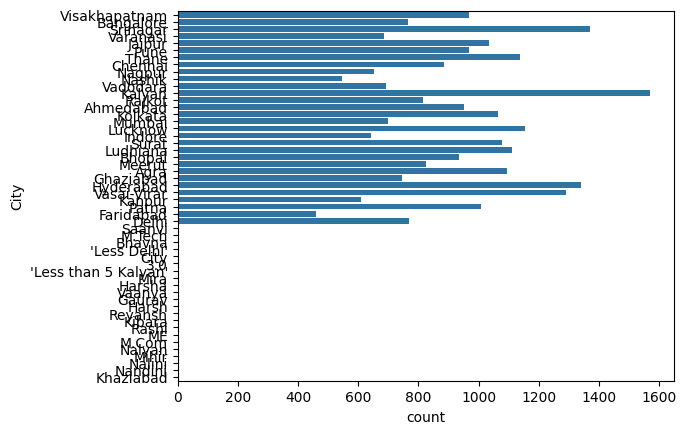

In [ ]:
sns.countplot(data=df, y='City')  ## There are some cities that we dont have data for, or minimal data for

<Axes: xlabel='count', ylabel='Profession'>

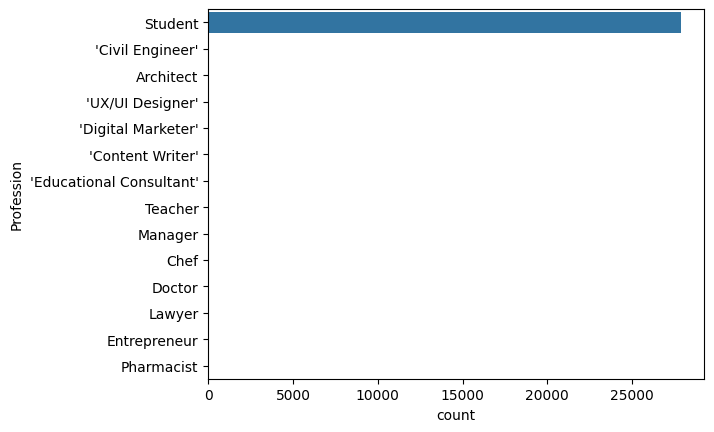

In [164]:
sns.countplot(data=df, y='Profession') ## We are only looking at students, making 'job satisfaction' and 'work pressure' useless data

<Axes: xlabel='count', ylabel='Degree'>

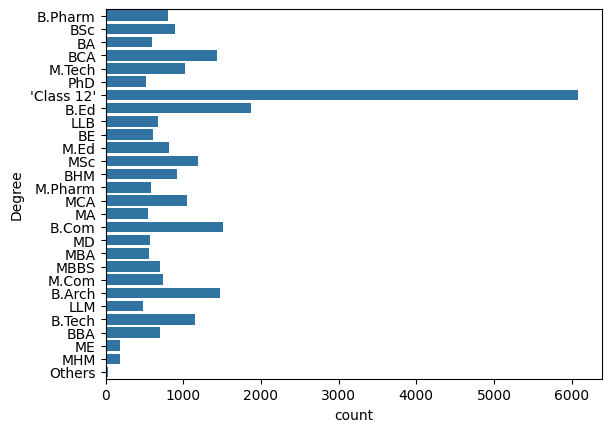

In [165]:
sns.countplot(data=df, y='Degree') ## Students working towards a 'class 12' degree were most common in the study

<Axes: xlabel='Depression', ylabel='count'>

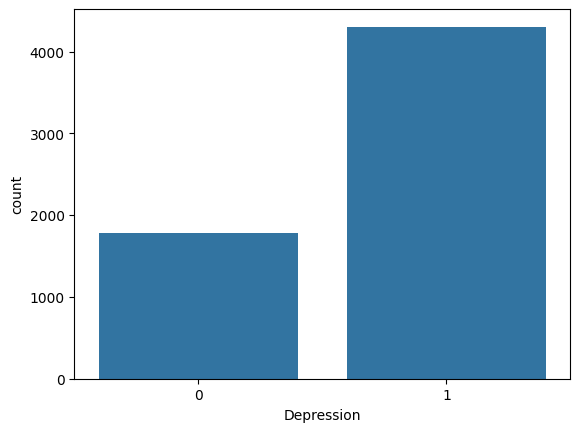

In [166]:
Class12Students = df[df['Degree'] == "'Class 12'"]
sns.countplot(data=Class12Students, x='Depression') ## A big majority of these class 12 major students are depressed in comparison to every other majors depression percentage

Text(0.5, 1.0, 'Not Depressed Student Data')

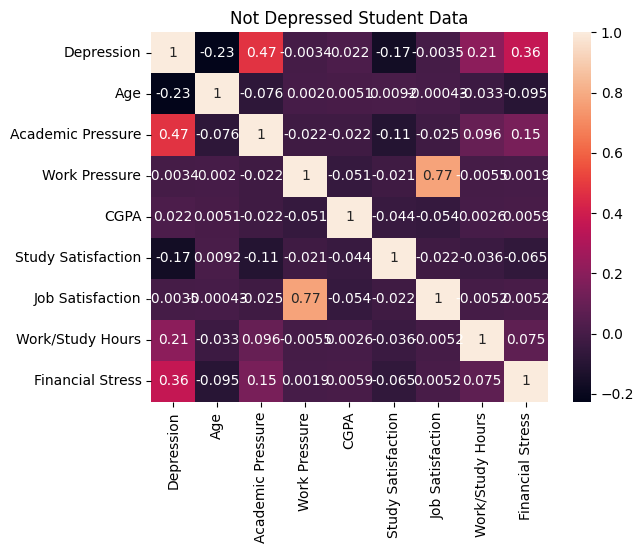

In [ ]:
FixFinancialStress = df[df['Financial Stress'] != '?']
subset = FixFinancialStress[['Depression', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']] ## 'Work/Study Hours' 'Financial Stress'
sns.heatmap(subset.corr(), annot=True, )
plt.title("Student Data")

## If im reading this data correctly it is saying that as job satisfaction goes up, Work pressure also goes up. 
#only academic pressure, financial stress, and study hours correlate somewhat with depression
#Most other values do not correlate with each other in any major way

In [169]:
df['Financial Stress'].unique() ## ? value is causing issues with heatmap above ^ Fixed above

array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object)

<Axes: xlabel='Family History of Mental Illness', ylabel='count'>

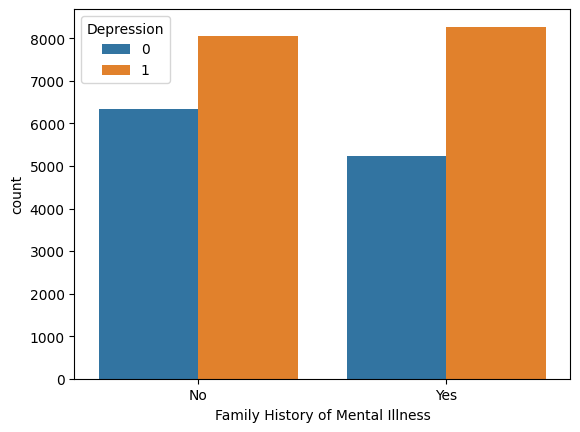

In [170]:
sns.countplot(data=df, x='Family History of Mental Illness', hue='Depression')  ## People with a family history of mental illness are slightly more likely to be depressed than those who dont


<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

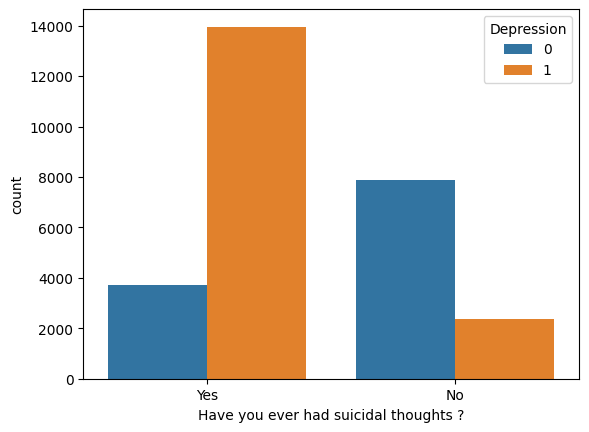

In [171]:
sns.countplot(data=df, x='Have you ever had suicidal thoughts ?', hue='Depression') ## Suicidal thoughts almost directly correlate to depression

<Axes: xlabel='Depression', ylabel='count'>

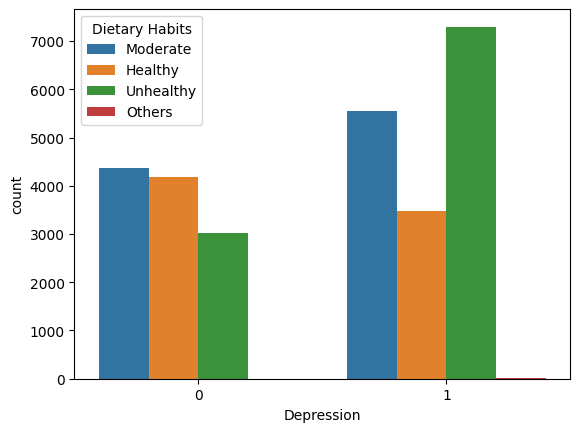

In [172]:
sns.countplot(data=df, x='Depression', hue='Dietary Habits') ## A mojority of depressed people are unhealthy or moderately healthy.

<Axes: xlabel='Depression', ylabel='count'>

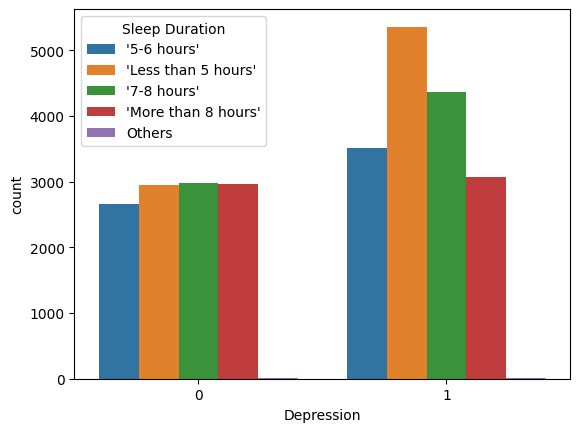

In [173]:
sns.countplot(data=df, x='Depression', hue='Sleep Duration') ## People with depression also mostly sleep less than 5 hours
# Side note: is there a way to order the data properly? show less than 5 hours first and move up from there?

<Axes: xlabel='Depression', ylabel='count'>

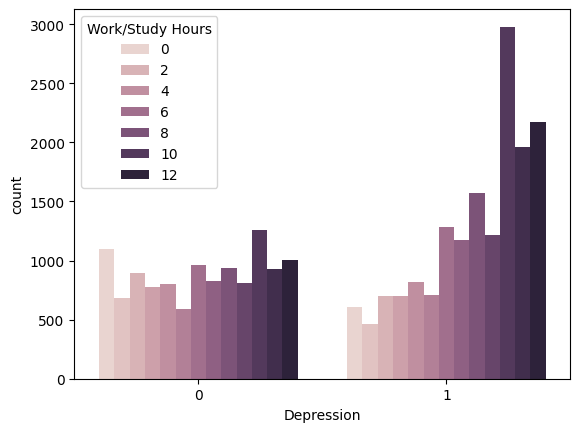

In [174]:
sns.countplot(data=df, x='Depression', hue='Work/Study Hours') ## Most interesting data by far actually, depressed people end up studing for longer
# Is this due to a lack of attention span caused by the depression? Is there a lack of understanding that requires more studing, leading to depression?

<Axes: xlabel='Work/Study Hours', ylabel='Degree'>

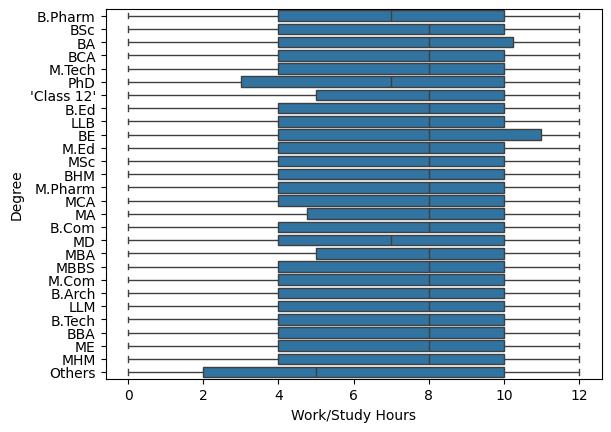

In [175]:
sns.boxplot(data=df, y='Degree', x='Work/Study Hours')  ## Study time average is fairly consistent throughout degree type